In [ ]:
!pip install sqlalchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [ ]:
!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=91d680cb3e181ad2464f807cbcdc75fcf99a353573e7b6527c5226445048b451
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import numpy as np
import os
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from datetime import date
from pandas import DataFrame
from pandasql import sqldf
from pandas.core.reshape.pivot import pivot_table
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/Data Analytics/private-key-group.json"

In [ ]:
bqclient = bigquery.Client()

# Data Description

Data diambil dari bitlabs-dab.G_CID_01.rfm_analysis

In [ ]:
#mengambil data dari bigquery dan membuat kolom gmw baru yang type datanya float
query_string = """
SELECT *,
CAST(safe.parse_numeric(gmv)as float64) as gmv
FROM `bitlabs-dab.G_CID_01.rfm_analysis`
"""

df = (
    bqclient.query(query_string)
    .result()
    .to_dataframe()
)
df

,order_id,user_id,order_source,cat_name,gmv,order_datetime,rejected_datetime,platform_source,user_last_login_datetime,user_register_datetime,gmv_1
0,BHUhJ1ksV0RjEcF9oQkbQJi0Rrh/NmJBRTo29ReUDPM=,DydI3J1+v/H4wTK8moAOHIZivZfyspk3Kepm38G7bJw=,03. PSP,"Beauty, Sport & Fashion",3.00E+07,2022-03-12 10:44:39+00:00,NaT,Android,NaT,2021-10-27 10:25:44+00:00,3.000000e+07
1,+VhWJAaZXDzU63l+jUTWvYLyEeMQ/2ixTT41tm4Fr9w=,DydI3J1+v/H4wTK8moAOHIZivZfyspk3Kepm38G7bJw=,03. PSP,Agriculture & Food,6000000,2022-03-14 10:46:35+00:00,NaT,Android,NaT,2021-10-27 10:25:44+00:00,6.000000e+06
2,QFrBNR0uMfxxQxaMGUUxkmb+wh3qLEPwQY+/JLMUZ1M=,DydI3J1+v/H4wTK8moAOHIZivZfyspk3Kepm38G7bJw=,03. PSP,Agriculture & Food,3.00E+07,2022-04-16 08:04:58+00:00,NaT,Android,NaT,2021-10-27 10:25:44+00:00,3.000000e+07
3,tAhovo1iW5WzCOLpUAbM1Lcp+andZZrxjN2+hsOiABQ=,kEYBJVev9XTppv3P/Dtk7Yc3hPg8cFHAZvu8oWgklFY=,03. PSP,Agriculture & Food,1935000,2022-01-21 01:09:05+00:00,NaT,Android,NaT,2022-01-01 23:52:52+00:00,1.935000e+06
4,Xr3LDnjb7YXrW38OBFEvythV21RA4hLaHYto61nMnak=,DydI3J1+v/H4wTK8moAOHIZivZfyspk3Kepm38G7bJw=,03. PSP,Electronics,3.00E+07,2022-04-12 10:13:20+00:00,NaT,Android,NaT,2021-10-27 10:25:44+00:00,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...
40126,B04Jd9gB+63zsWMjI+BuigWIhm3LWJ09f+Zc3laQQkM=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Agriculture & Food,"4,19E+10",2022-03-18 14:33:26+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,4.190000e+12
40127,RKZTuORz7h5YxyDnOMC1GaPXHdQJ/+rh2UpnCGCyra8=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Health & Medical,1.88E+07,2021-12-21 10:33:41+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,1.880000e+07
40128,7x82euputR6EjZoO7gMwIdXE0xc0aI44F32Nbsb5szA=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Computer & Communication,6650000,2022-04-14 12:48:05+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,6.650000e+06
40129,Yyjvi5RlLdOtcE0rpgMd7V/vhTt7lTDDEQMHp8BqkIY=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,"Beauty, Sport & Fashion","1,44E+10",2022-03-29 08:42:06+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,1.440000e+12


In [ ]:
#hapus kolom gmv lama dengan type data object
del(df['gmv'])

# Handling Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40131 entries, 0 to 40130
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   order_id                  40065 non-null  object             
 1   user_id                   40131 non-null  object             
 2   order_source              40131 non-null  object             
 3   cat_name                  40131 non-null  object             
 4   order_datetime            40131 non-null  datetime64[ns, UTC]
 5   rejected_datetime         1064 non-null   datetime64[ns, UTC]
 6   platform_source           40131 non-null  object             
 7   user_last_login_datetime  37928 non-null  datetime64[ns, UTC]
 8   user_register_datetime    40131 non-null  datetime64[ns, UTC]
 9   gmv_1                     39937 non-null  float64            
dtypes: datetime64[ns, UTC](4), float64(1), object(5)
memory usage: 3.1+ MB


Kami memutuskan untuk men-drop missing value 'order_id' dan 'user_last_login_datetime' karena missing value ini bersifat Missing Value Completely at Random (MCAR) yang artinya missing data yang terjadi benar-benar secara random.

In [ ]:
df = df.dropna(subset=['order_id'])
df = df.dropna(subset=['user_last_login_datetime'])

<ipython-input-10-0e63f90762c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gmv_1'])


<Axes: xlabel='gmv_1', ylabel='Density'>

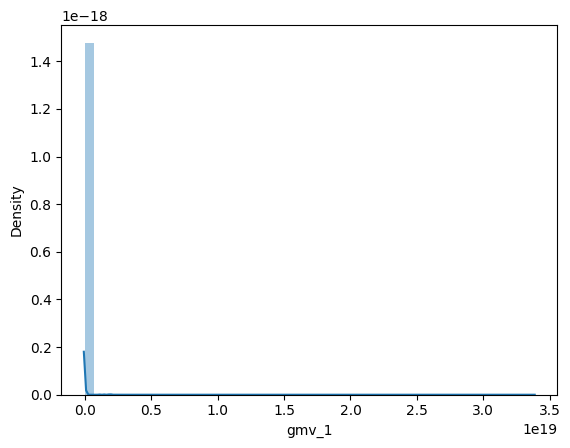

In [ ]:
sns.distplot(df['gmv_1'])

In [ ]:
#karena distribusi gmv_1 tidak berdistribusi normal maka missing value gmv_1 diganti dengan median
df['gmv_1'] = df['gmv_1'].fillna(df['gmv_1'].median())

In [ ]:
#nilai null pada 'rejected_datetime' berarti orderan diterima user
df.isnull().sum()

order_id                        0
user_id                         0
order_source                    0
cat_name                        0
order_datetime                  0
rejected_datetime           36817
platform_source                 0
user_last_login_datetime        0
user_register_datetime          0
gmv_1                           0
dtype: int64

# Handling Duplicate Value

In [ ]:
df.duplicated().sum()

145

In [ ]:
df[df.duplicated(['order_id', 'user_id','order_datetime'], keep=False)]

,order_id,user_id,order_source,cat_name,order_datetime,rejected_datetime,platform_source,user_last_login_datetime,user_register_datetime,gmv_1
151,eN10BmyVLOxHlXSB6kk9o+7YQ43Mr7akv2U1rGtsyIE=,RD3ye1vIr7qzqO3lKlwpOFhWAhXvsTc2S3iCi6RMt7A=,03. PSP,Computer & Communication,2019-09-23 10:38:44+00:00,NaT,website,2021-06-29 16:23:00+00:00,2019-04-18 10:22:57+00:00,2.184000e+06
156,eN10BmyVLOxHlXSB6kk9o+7YQ43Mr7akv2U1rGtsyIE=,RD3ye1vIr7qzqO3lKlwpOFhWAhXvsTc2S3iCi6RMt7A=,03. PSP,Computer & Communication,2019-09-23 10:38:44+00:00,NaT,website,2021-06-29 16:23:00+00:00,2019-04-18 10:22:57+00:00,6.110000e+06
179,cQidpOh6R1H4a7bv+iiSvNRFQ1VG8xR7Iu9KIIV/fBU=,whBCR6dvR3k3PyAwWvdEQFOvfyirpExREgRg5rKFDzc=,03. PSP,Computer & Communication,2019-06-18 10:39:10+00:00,NaT,website,2021-06-02 19:02:32+00:00,2019-04-25 06:34:22+00:00,4.640000e+13
183,cQidpOh6R1H4a7bv+iiSvNRFQ1VG8xR7Iu9KIIV/fBU=,whBCR6dvR3k3PyAwWvdEQFOvfyirpExREgRg5rKFDzc=,03. PSP,Computer & Communication,2019-06-18 10:39:10+00:00,NaT,website,2021-06-02 19:02:32+00:00,2019-04-25 06:34:22+00:00,4.040000e+13
229,Eg0/5A4A3RVXRJrvdF4xM8euzU4L3vJCVNBT5H5rCMk=,i2G59UDcwhxqNTYRHtSaF7RYGehqCHZbfkOFZm9fKsI=,03. PSP,Computer & Communication,2022-02-07 14:01:31+00:00,NaT,Android,2021-07-11 20:02:04+00:00,2021-07-11 19:51:34+00:00,2.580000e+13
...,...,...,...,...,...,...,...,...,...,...
40068,INRgNphnJgqUL/Qb+LsRyrXghWO/C/jePfDQ+pIGSWY=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Computer & Communication,2022-03-11 10:04:42+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,3.300000e+07
40072,INRgNphnJgqUL/Qb+LsRyrXghWO/C/jePfDQ+pIGSWY=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Computer & Communication,2022-03-11 10:04:42+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,2.200000e+07
40080,1+KLmDshD1zY8tvwz9rXto2p2WV+nd8O60f1i2ZXqP4=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Machinery & Industrial Parts,2022-04-20 15:15:37+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,7.480000e+06
40115,0Qshmvpe469APck3vFd2c2YBbvHoh/9bT3pVUn6Sk3Q=,sGK09zCINPfknDbtGeAem5qds3mrxQXr5huKjibG5vw=,99. Program A,Health & Medical,2022-06-20 15:13:10+00:00,NaT,website,2023-02-21 08:42:59+00:00,2021-09-03 09:22:21+00:00,3.750000e+07


Hasil pengecekan menunjukan bahwa data yang duplicate terjadi karena adanya customer yang bertransaksi yang sama dan membeli item yang sama. Berdasarkan pengecekan tersebut, kami memutuskan untuk menghapus data yang duplicate karena transaksi yang terjadi sebenarnya sama.

In [ ]:
df = df.drop_duplicates(['order_id', 'user_id','order_datetime'], keep=False)

In [ ]:
df.duplicated().sum()

0

# Handling Outliers

In [ ]:
df['gmv_1'] = df['gmv_1'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe2ed4144f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe2ed414a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe2ed414250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe2ed414f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe2ed415210>],
 'means': []}

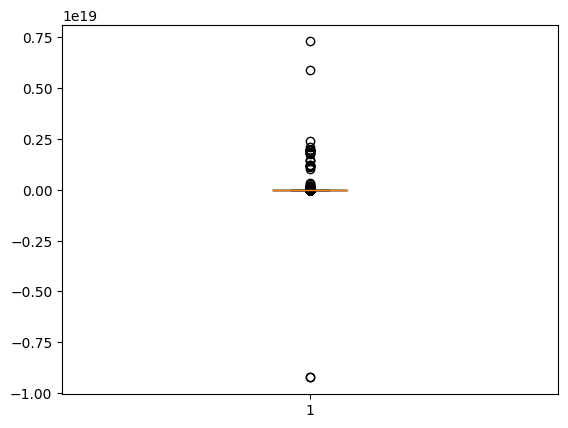

In [ ]:
plt.boxplot(df['gmv_1'])
#dari boxplot dibawah terdapat outliner pada kolom gmv_1 namun menurut kami bukan anomali sehingga tidak perlu di drop

In [ ]:
df['gmv_1'].describe()

count    3.610700e+04
mean     1.330910e+15
std      9.641378e+16
min     -9.223372e+18
25%      2.000000e+05
50%      3.810000e+06
75%      9.795000e+07
max      7.280000e+18
Name: gmv_1, dtype: float64

# Data Transformation and Feature Engineering

In [ ]:
#menambahkan kolom channels
def format_val(x):
  if x == '01. Agent':
    return "Agent Program"
  elif x == '03. PSP':
    return "Seller Program"
  elif x == '04. TTS':
    return "Voucher Program"
  elif x == '13. Neoclinic':
    return "Healthcare and Merchandise Program"
  elif x == '08. Homebrand':
    return "Healthcare and Merchandise Program"
  elif x == '99. Program A':
    return "Prospect Program"
  elif x == '06. Organic':
    return "Organic"
  else:
    return x== "Exporium"

df['channels'] = df['order_source'].apply(format_val)

In [ ]:
#menambahkan kolom segment_category
def format_val2(x):
  if x == 'Agriculture & Food' :
    return 'F & B'
  elif x == 'Horeca':
    return 'F & B'
  elif x ==  'Machinery & Industrial Parts' :
    return 'MRO'
  elif x ==  'Building Materials' :
    return 'MRO'
  elif x == 'Automotive & Trasnportation':
    return 'MRO'
  elif x == 'Health & Medicare':
    return 'Health & Beauty'
  elif x == 'Beauty Sport & Fashion':
    return 'Health & Beauty'
  elif x ==  'Computer & Communication':
    return '3C & Others'
  else:
    return x== '3C & Others'

df['segment_category'] = df['cat_name'].apply(format_val2)

In [ ]:
df['refund_status'] = df['rejected_datetime'].apply(lambda x: 'refund' if pd.notnull(x) else 'not refund')

# Exploratory Data Analysis

RFM adalah Salah satu teknik yang dapat digunakan untuk melakukan Customer Segmentation untuk mengetahui buying behavior dari customer. Arti dari RFM sendiri adalah:

Recency: Waktu terakhir kali customer melakukan pembelian

Frequency: Jumlah transaksi

Monetary: Kekuatan belanja dari sebuah customer

Dengan menggunakan RFM, perusahaan dapat mengaktifkan kembali customer yang jarang bertransaksi, membuat customer menjadi lebih loyal, menigkatkan strategi marketing sehingga dapat meningkatkan revenue dari sebuah perusahaan.


Untuk Recency, dilihat dari waktu terakhir dari column order_datetime.

Frequency dibuat dari jumlah order yang dibuat customer.

Monetary dibuat dari rata-rata gmv per bulan customer

In [ ]:
#Mencari distribusi rfm
user = df.groupby('user_id', as_index=False).agg(
    recency =  ('order_datetime', lambda x: (df['order_datetime'].max()-x.max()).days),
    frequency = ('order_id', lambda x: x.nunique()),
    monetary =  ('gmv_1', 'sum'),
)
df_rfm = pd.DataFrame(user)
df_rfm

,user_id,recency,frequency,monetary
0,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,989,7,5991500000452300
1,++IyDjM6tKXtuoWX1Qg0yGNd2BAOTzhtjrpZvNy2JAY=,331,4,4970025250000
2,++Qu2pueGIjaldctVcX7+6/pX1fJn3iSXzHqdCw6zUo=,1107,1,98000000
3,++tVxwvop+KSlBLSKp0xr5CkDN4rYQGKDx+rqQMI21M=,1364,1,540000
4,+/bchMIO0gQwrfG4slyith6d7DEsg7lknEDY8IJWp04=,885,1,250000
...,...,...,...,...
17500,zynXSX7VL+kDNpULpBvLB8rFBvYo3DqV2lhMNBs9v0I=,76,1,330000
17501,zytUaJ61YyHDfQr18+sVhRPN1UEbzmjUangA2GyU69Y=,1423,1,500000
17502,zyuzrr04JUkcwJWJkXCZBdwWj/0iDWdKChNaQoBgkOE=,638,3,14240000000000
17503,zywj5AT9blbwOZhOPNAgrztXUt5XkGZsf8q3LlMruOE=,630,1,2040000


<Figure size 1000x600 with 0 Axes>

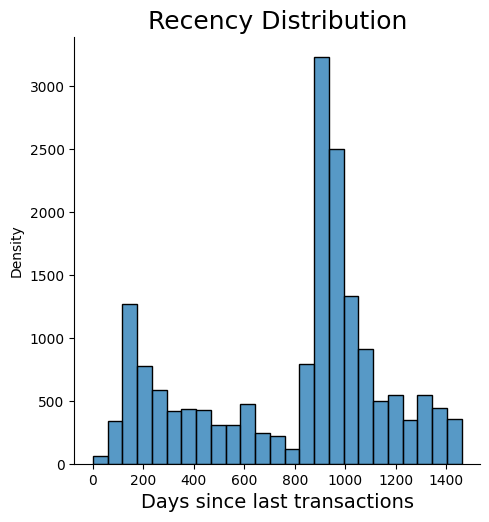

In [ ]:
#Distribusi recency
plt.figure(figsize=(10, 6))
sns.displot(df_rfm['recency'], bins=25)
plt.title('Recency Distribution', fontsize=18)
plt.xlabel('Days since last transactions', fontsize=14)
plt.ylabel('Density')
plt.show()

In [ ]:
df_rfm['recency'].describe()

count    17505.000000
mean       794.856955
std        369.143220
min          0.000000
25%        486.000000
50%        921.000000
75%       1012.000000
max       1460.000000
Name: recency, dtype: float64

In [ ]:
df_rfm['recency'].mode()

0    917
Name: recency, dtype: int64

Berdasarkan distribusi dan deskripsi dari recency:

Waktu terakhir user melakukan transaksi pada rentang 0 hingga 1460 hari (tanggal max dari data), rata-rata user melakukan transaksi pada 794 hari atau sekitar 2 tahun yang lalu. Dan paling banyak user melakukan transaksi sekitar 917 hari atau 2.5 tahun yang lalu.

<Figure size 1000x600 with 0 Axes>

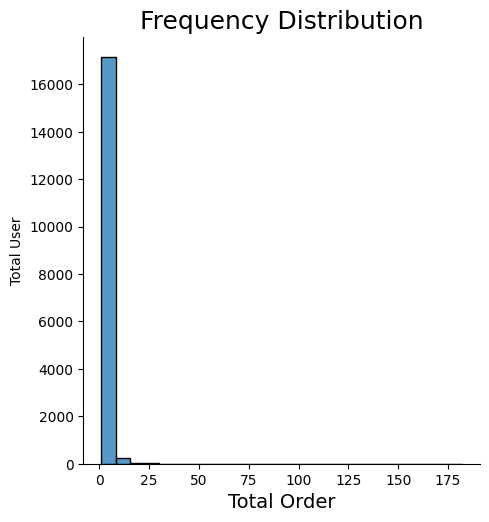

In [ ]:
#Distribusi frequency
plt.figure(figsize=(10, 6))
sns.displot(df_rfm['frequency'], bins=25)
plt.title('Frequency Distribution', fontsize=18)
plt.xlabel('Total Order', fontsize=14)
plt.ylabel('Total User')
plt.show()

In [ ]:
df_rfm['frequency'].describe()

count    17505.000000
mean         2.062668
std          5.877920
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        182.000000
Name: frequency, dtype: float64

In [ ]:
df_rfm['frequency'].mode()

0    1
Name: frequency, dtype: int64

Berdasarkan distribusi dan deskripsi dari frequency:

Rata-rata user melakukan pembelian sebanyak 2 kali pada

<Figure size 1000x600 with 0 Axes>

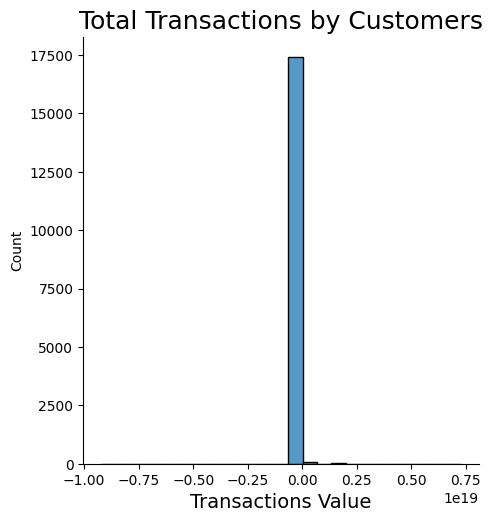

In [ ]:
# Distribusi monetary
plt.figure(figsize=(10, 6))
sns.displot(user['monetary'], bins=25)
plt.title('Total Transactions by Customers', fontsize=18)
plt.xlabel('Transactions Value', fontsize=14)
plt.show()

# RFM Analysis

In [ ]:
#Pengelompokan segmentasi

#Segmantasi recency
def segment_recency(col):
  if col >= pd.Timestamp('2018-01-01', tz='UTC') and col<= pd.Timestamp('2018-12-31', tz='UTC'):
    return "1"
  elif col >= pd.Timestamp('2019-01-01', tz='UTC') and col<= pd.Timestamp('2019-12-31', tz='UTC'):
    return "2"
  elif col >= pd.Timestamp('2020-01-01', tz='UTC') and col<= pd.Timestamp('2020-12-31', tz='UTC'):
    return "3"
  elif col >= pd.Timestamp('2021-01-01', tz='UTC') and col<= pd.Timestamp('2021-12-31', tz='UTC'):
    return "4"
  elif col >= pd.Timestamp('2022-01-01', tz='UTC') and col<= pd.Timestamp('2022-12-31', tz='UTC'):
    return "5"

#Segmentasi frequency
def segment_frequency(col):
  if col <= 6:
    return "1"
  elif col > 6 and col <= 12:
    return "2"
  elif col > 12 and col <= 24:
    return "3"
  elif col > 24 and col <= 36:
    return "4"
  else:
    return "5"

#Segmentasi monetary
def segment_monetary(col):
  if col > 100000000:
    return "5"
  elif col >= 50000000 and col<= 100000000:
    return "4"
  elif col >= 10000000 and col<= 50000000:
    return "3"
  elif col >= 5000000 and col<= 10000000:
    return "2"
  elif col<5000000:
    return "1"

## Recency

In [ ]:
#Melakukan pengurutan berdasarkan user_id dan order_datetime secara menurun
df_sorted = df.sort_values(by=['user_id', 'order_datetime'], ascending=[True, False])

In [ ]:
#Mengelompokkan berdasarkan user_id dan mengambil baris pertama untuk setiap kelompok
df_grouped = df_sorted.groupby('user_id').first().reset_index()

In [ ]:
#Mengubah tipe data kolom 'order_datetime' menjadi datetime
df_grouped['order_datetime'] = pd.to_datetime(df_grouped['order_datetime'])

In [ ]:
#Mengurutkan DataFrame hasil berdasarkan order_datetime secara menurun
df_result = df_grouped.sort_values(by='order_datetime', ascending=False)
df_result.head()

,user_id,order_id,order_source,cat_name,order_datetime,rejected_datetime,platform_source,user_last_login_datetime,user_register_datetime,gmv_1,channels,segment_category,refund_status
6419,LXBLFS0B5ILfeZqBcUsTxmbtHTxf+pm7baWVZRZ6UX8=,NJTXFSPVnoaXholIyjlketCQRH4nxwamCVxDgurXehk=,99. Program A,Agriculture & Food,2022-07-01 16:16:10+00:00,NaT,website,2023-02-21 08:33:53+00:00,2021-09-03 09:31:00+00:00,71100000,Prospect Program,F & B,not refund
5410,HrwFzsZ1zuM353NMdWwSgubbaWfLNVZOZo4cH5D04DM=,uu7bIsv8/K8YEazu077Bn+3M0rvmDoaIbEQmHocL1kY=,99. Program A,Machinery & Industrial Parts,2022-07-01 16:13:23+00:00,NaT,website,2023-02-21 08:43:16+00:00,2021-09-03 09:28:30+00:00,45000000,Prospect Program,MRO,not refund
12459,hkl1h0J7bi8/dtcyVjOhfJ9nbuYaC5jUawvuUP4/JYI=,SnzicI3l5vwncEe+2FKs62mb5bG9lRcoJYjOjF6RmSs=,99. Program A,Machinery & Industrial Parts,2022-07-01 16:05:52+00:00,NaT,website,2023-02-21 08:46:37+00:00,2021-09-03 08:49:33+00:00,7810000000000,Prospect Program,MRO,not refund
4827,FfvnOIwxOQL3hPbWpxRL4vb6sTrtmHituZPS6i8iiOU=,iNLGXfB09c2UgxEcM61cddEMHljr+lMwfTEZMwCXFYQ=,99. Program A,"Beauty, Sport & Fashion",2022-07-01 15:34:19+00:00,NaT,website,2023-02-21 08:41:05+00:00,2021-09-01 03:03:27+00:00,47000000,Prospect Program,False,not refund
15190,rkOLa0IqQqu2sVDFWLPoElI7YRJKpfxXUzyx1IniVig=,1UtqlZycwLDNUDvHtNWR5pnR6ScvSuvLArXltcHrwmo=,99. Program A,"Beauty, Sport & Fashion",2022-07-01 14:47:28+00:00,NaT,website,2023-02-21 08:33:11+00:00,2021-09-03 09:26:22+00:00,58500000,Prospect Program,False,not refund


In [ ]:
#Menambahkan kolom "segment_recency" ke DataFrame df_result
df_result['segment_recency'] = df_result['order_datetime'].apply(segment_recency)
df_recency = df_result[['user_id', 'order_datetime', 'segment_recency']]
df_recency.head()

,user_id,order_datetime,segment_recency
6419,LXBLFS0B5ILfeZqBcUsTxmbtHTxf+pm7baWVZRZ6UX8=,2022-07-01 16:16:10+00:00,5
5410,HrwFzsZ1zuM353NMdWwSgubbaWfLNVZOZo4cH5D04DM=,2022-07-01 16:13:23+00:00,5
12459,hkl1h0J7bi8/dtcyVjOhfJ9nbuYaC5jUawvuUP4/JYI=,2022-07-01 16:05:52+00:00,5
4827,FfvnOIwxOQL3hPbWpxRL4vb6sTrtmHituZPS6i8iiOU=,2022-07-01 15:34:19+00:00,5
15190,rkOLa0IqQqu2sVDFWLPoElI7YRJKpfxXUzyx1IniVig=,2022-07-01 14:47:28+00:00,5


In [ ]:
df_recency['segment_recency'].value_counts()

2    8059
3    3317
4    2887
5    1774
1    1368
Name: segment_recency, dtype: int64

**Keterangan :**

1 : Jika last order custimer dilakukan pada tahun 2018 dan sebelumnya

2 : Jika last order custimer dilakukan pada tahun 2019

3 : Jika last order custimer dilakukan pada tahun 2020

4 : Jika last order custimer dilakukan pada tahun 2021

5 : Jika last order custimer dilakukan pada tahun 2022


**Berdasarkan nilai frequency-nya. Terdapat 5 segmen yaitu:**

1 : Terdapat 1368 customer dengan last order pada tahun 2018 dan sebelumnya

2 : Terdapat 8059 customer dengan last order pada tahun 2019

3 : Terdapat 3317 customer dengan last order pada tahun 2020

4 : Terdapat 2887 customer dengan last order pada tahun 2021

5 : Terdapat 1774 customer dengan last order pada tahun 2022

*Maka bisa disimpulkan bahwa mayoritas customer Ralali berada pada segmen 2, yang artinya customer melakukan last order pada tahun 2019*

## Frequency

In [ ]:
#Melakukan seleksi pada DataFrame df dengan kondisi rejected_datetime IS NULL
df = df[df['rejected_datetime'].isnull()]

In [ ]:
#Menghitung jumlah order_id berdasarkan user_id menggunakan groupby
df_grouped = df.groupby('user_id').agg(total_order=('order_id', 'count')).reset_index()

In [ ]:
#Mengurutkan hasil berdasarkan jumlah terbanyak (total_order) secara menurun
df_sorted = df_grouped.sort_values(by='total_order', ascending=False)

In [ ]:
df_sorted['segment_frequency'] = df_sorted['total_order'].apply(segment_frequency)
df_frequency = df_sorted[['user_id', 'total_order', 'segment_frequency']]
df_frequency.head()

,user_id,total_order,segment_frequency
8298,T5fs/I07KJ/lJjmFriHNU+q34hIJvqMNE6W+YpsVTTA=,182,5
1728,4NGSSxa5sqZJ+4I6e9i4sjNyGONdJoSJt6lOYWhKxfM=,155,5
1951,5D9+BctQpkfVHUPeoj11zGqxGu6s9WrMA0egWu73o+w=,151,5
6317,LkiZe9rJDROHn4V0n98SNDkTm/GrqOzKgqIhpfnX3IA=,143,5
15956,vw8w8wSPeLRksZr/jrW8BMPou/Vj6rX8FKZ8SXjR3FY=,142,5


In [ ]:
df_frequency['segment_frequency'].value_counts()

1    16490
2      437
3       91
5       52
4       15
Name: segment_frequency, dtype: int64

**Keterangan :**

1 : Jika frequensi melakukan transaksi <= 6

2 : Jika frequensi melakukan transaksi antara 7-12 kali

3 : Jika frequensi melakukan transaksi antara 13-24 kali

4 : Jika frequensi melakukan transaksi antara 25-36 kali

5 : Jika frequensi melakukan transaksi lebih dari 36 kali


**Berdasarkan nilai frequency-nya. Terdapat 5 segmen yaitu:**

1 : Terdapat 16490 customer yang melakukan <=6 kali transaksi

2 : Terdapat 437 customer yang melakukan transaksi sebanyak 7-12 kali.

3 : Terdapat 91 customer yang melakukan transaksi sebanyak 13-24 kali

4 : Terdapat 15 customer yang melakukan transaksi sebanyak 25-36 kali

5 : Terdapat 53 customer yang melakukan transaksi sebanyak lebih dari 36 kali

*Maka bisa disimpulkan bahwa mayoritas customer Ralali berada pada segmen 1, yang artinya hanya melakukan transaksi <= 6 kali saja*

## Monetary

In [ ]:
#Melakukan seleksi pada DataFrame df dengan kondisi rejected_datetime IS NULL
df = df[df['rejected_datetime'].isnull()]

In [ ]:
#Menghitung rata-rata gmv_1 berdasarkan user_id dan Month_of_order menggunakan groupby
df_grouped = df.groupby(['user_id', pd.Grouper(key='order_datetime', freq='M')]).agg({'gmv_1': 'mean'}).reset_index()
df_grouped

,user_id,order_datetime,gmv_1
0,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,2019-02-28 00:00:00+00:00,1.770000e+14
1,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,2019-05-31 00:00:00+00:00,2.440000e+13
2,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,2019-07-31 00:00:00+00:00,5.940000e+14
3,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,2019-09-30 00:00:00+00:00,2.515000e+15
4,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,2019-10-31 00:00:00+00:00,8.305000e+13
...,...,...,...
26557,zynXSX7VL+kDNpULpBvLB8rFBvYo3DqV2lhMNBs9v0I=,2022-04-30 00:00:00+00:00,3.300000e+05
26558,zyuzrr04JUkcwJWJkXCZBdwWj/0iDWdKChNaQoBgkOE=,2019-07-31 00:00:00+00:00,9.700000e+12
26559,zyuzrr04JUkcwJWJkXCZBdwWj/0iDWdKChNaQoBgkOE=,2020-09-30 00:00:00+00:00,2.270000e+12
26560,zywj5AT9blbwOZhOPNAgrztXUt5XkGZsf8q3LlMruOE=,2020-10-31 00:00:00+00:00,2.040000e+06


In [ ]:
#Menghitung rata-rata gmv_1 bulanan berdasarkan user_id menggunakan groupby
df_monthly_avg = df_grouped.groupby('user_id').agg({'gmv_1': 'mean'}).reset_index()
df_monthly_avg

,user_id,gmv_1
0,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,6.786900e+14
1,++IyDjM6tKXtuoWX1Qg0yGNd2BAOTzhtjrpZvNy2JAY=,1.242506e+12
2,++Qu2pueGIjaldctVcX7+6/pX1fJn3iSXzHqdCw6zUo=,9.800000e+07
3,++tVxwvop+KSlBLSKp0xr5CkDN4rYQGKDx+rqQMI21M=,5.400000e+05
4,+/bchMIO0gQwrfG4slyith6d7DEsg7lknEDY8IJWp04=,2.500000e+05
...,...,...
17080,zySiC/HPRf9AdhDIwQamizFnrNkIpTojLTi5T0xi6ls=,3.356150e+07
17081,zynXSX7VL+kDNpULpBvLB8rFBvYo3DqV2lhMNBs9v0I=,3.300000e+05
17082,zyuzrr04JUkcwJWJkXCZBdwWj/0iDWdKChNaQoBgkOE=,5.985000e+12
17083,zywj5AT9blbwOZhOPNAgrztXUt5XkGZsf8q3LlMruOE=,2.040000e+06


In [ ]:
#Mengubah nama kolom 'gmv_1' menjadi 'AVG_monthly_gmv'
df_monthly_avg.rename(columns={'gmv_1': 'AVG_monthly_gmv'}, inplace=True)

In [ ]:
df_monthly_avg['segment_monetary'] = df_monthly_avg['AVG_monthly_gmv'].apply(segment_monetary)
df_monetary= df_monthly_avg[['user_id', 'AVG_monthly_gmv', 'segment_monetary']]
df_monetary.head()

,user_id,AVG_monthly_gmv,segment_monetary
0,++8t6Li0yZ89vefY/yWarbOKL50ljj3QcobdDn6n78Y=,6.786900e+14,5
1,++IyDjM6tKXtuoWX1Qg0yGNd2BAOTzhtjrpZvNy2JAY=,1.242506e+12,5
2,++Qu2pueGIjaldctVcX7+6/pX1fJn3iSXzHqdCw6zUo=,9.800000e+07,4
3,++tVxwvop+KSlBLSKp0xr5CkDN4rYQGKDx+rqQMI21M=,5.400000e+05,1
4,+/bchMIO0gQwrfG4slyith6d7DEsg7lknEDY8IJWp04=,2.500000e+05,1


In [ ]:
df_monetary['segment_monetary'].value_counts()

1    10908
5     4005
3     1261
2      669
4      242
Name: segment_monetary, dtype: int64

**Keterangan :**

1 : Jika rata-rata GMV per bulan < Rp 5 Mio

2 : Jika rata-rata GMV per bulan Rp 5 Mio - 10 Mio

3 : Jika rata-rata GMV per bulan Rp 10 Mio - 50 Mio

4 : Jika rata-rata GMV per bulan Rp 50 Mio - 100 Mio

5 : Jika rata-rata GMV per bulan > Rp 100 Mio


**Berdasarkan nilai frequency-nya. Terdapat 5 segmen yaitu:**

1 : Terdapat 10908 customer dengan rata-rata GMV per bulan < Rp 5 Mio

2 : Terdapat 669 customer dengan rata-rata GMV per bulan Rp 5 Mio - 10 Mio

3 : Terdapat 1261 customer dengan rata-rata GMV per bulan Rp 10 Mio - 50 Mio

4 : Terdapat 242 customer dengan rata-rata GMV per bulan Rp 50 Mio - 100 Mio

5 : Terdapat 4005 customer dengan rata-rata GMV per bulan > Rp 100 Mio


*Maka bisa disimpulkan bahwa mayoritas customer Ralali berada pada segmen 1, yang artinya customer memiliki rata-rata GMV per bulan < Rp 5 Mio*

## RFM Segmentation

In [ ]:
df_rfm = pd.merge(df_recency, df_frequency, on='user_id').merge(df_monetary, on='user_id')

In [ ]:
df_rfm['RFMClass'] =df_rfm['segment_recency'].map(str)+ df_rfm['segment_frequency'].map(str) + df_rfm['segment_monetary'].map(str)
df_rfm

,user_id,order_datetime,segment_recency,total_order,segment_frequency,AVG_monthly_gmv,segment_monetary,RFMClass
0,LXBLFS0B5ILfeZqBcUsTxmbtHTxf+pm7baWVZRZ6UX8=,2022-07-01 16:16:10+00:00,5,90,5,5.051907e+13,5,555
1,HrwFzsZ1zuM353NMdWwSgubbaWfLNVZOZo4cH5D04DM=,2022-07-01 16:13:23+00:00,5,109,5,3.734339e+13,5,555
2,hkl1h0J7bi8/dtcyVjOhfJ9nbuYaC5jUawvuUP4/JYI=,2022-07-01 16:05:52+00:00,5,113,5,9.380647e+15,5,555
3,FfvnOIwxOQL3hPbWpxRL4vb6sTrtmHituZPS6i8iiOU=,2022-07-01 15:34:19+00:00,5,111,5,2.596862e+16,5,555
4,rkOLa0IqQqu2sVDFWLPoElI7YRJKpfxXUzyx1IniVig=,2022-07-01 14:47:28+00:00,5,111,5,1.391206e+15,5,555
...,...,...,...,...,...,...,...,...
17080,p8ZEgNWPMJVSlpNEfk9PeuywEY1crmrFG6jFX7ZzlGM=,2018-07-04 12:37:16+00:00,1,1,1,1.025000e+05,1,111
17081,fB0eyx/gHulN+qBFe4yfrwR7pqr59vrrnIkmzt/zfLo=,2018-07-04 10:35:46+00:00,1,1,1,2.000000e+07,3,113
17082,mTsSwUc5yEHZQ2aACUQviHROo5GHDtpWF1qpsrTlSLE=,2018-07-04 10:18:34+00:00,1,1,1,1.990000e+07,3,113
17083,Xm/v7Jcf2J+zs4NR5nty4N+rFIe43QhS4DYoeTcVQ3I=,2018-07-04 10:09:06+00:00,1,1,1,1.990000e+12,5,115


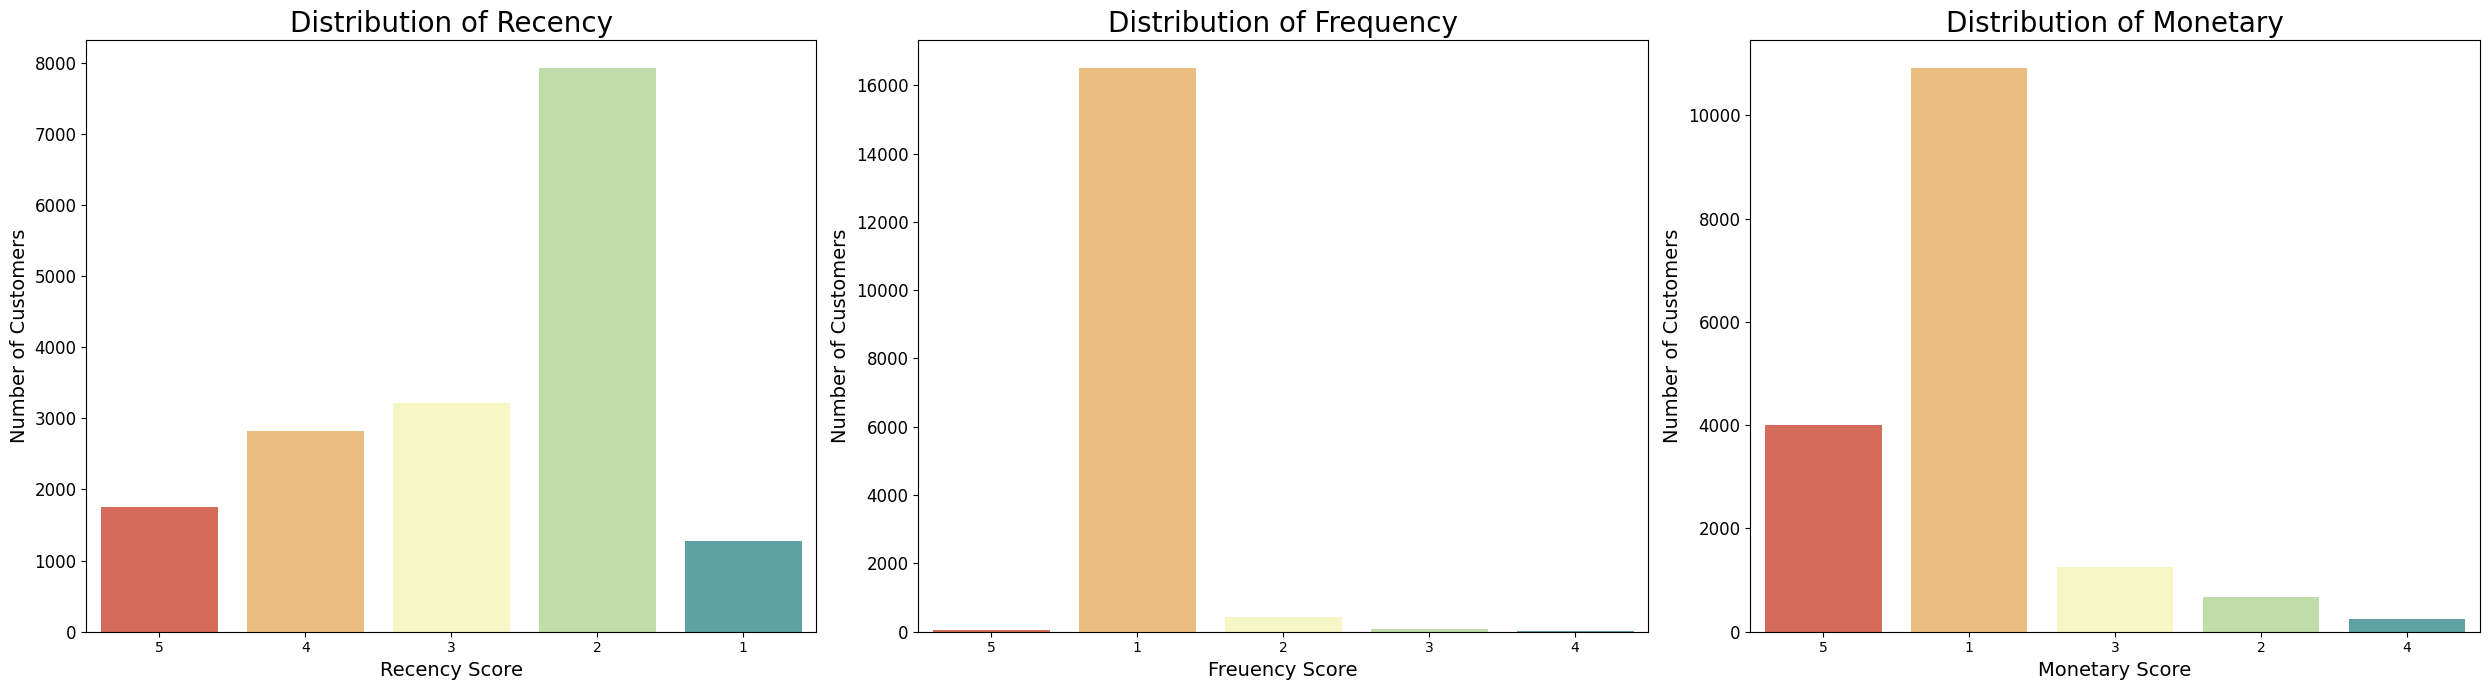

In [ ]:
# Visualization for Recency, Freuency, Monetary score distribution
plt.figure(figsize=(25, 7))

plt.subplot(131)
sns.countplot(x='segment_recency', data=df_rfm, palette='Spectral')
plt.title('Distribution of Recency',fontsize=20)
plt.xlabel('Recency Score',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(132)
sns.countplot(x='segment_frequency', data=df_rfm, palette='Spectral')
plt.title('Distribution of Frequency',fontsize=20)
plt.xlabel('Freuency Score',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(133)
sns.countplot(x='segment_monetary', data=df_rfm, palette='Spectral')
plt.title('Distribution of Monetary',fontsize=20)
plt.xlabel('Monetary Score',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# RFM Segmentation
def segmentation(x):
    if re.search('55.', x) or re.search('54.', x):
        return 'Champions'
    elif re.search('53.', x) or re.search('52.', x) or re.search('43.', x) or re.search('42.', x):
        return 'potensial loyalist'
    elif re.search('51.', x):
        return 'new costomers'
    elif re.search('45.', x) or re.search('44.', x) or re.search('35.', x) or re.search('34.', x):
        return 'Loyal costomers'
    elif re.search('41.', x):
        return 'promising'
    elif re.search('33.', x):
        return 'need attention'
    elif re.search('32.', x) or re.search('31.', x):
        return 'about to sleep'
    elif re.search('25.', x) or re.search('15.', x):
        return "can't loose them"
    elif re.search('24.', x) or re.search('23.', x) or re.search('14.', x) or re.search('13.', x):
        return 'at risk'
    elif re.search('22.', x) or re.search('21.', x) or re.search('12.', x) or re.search('11.', x):
        return 'hibernating'


df_rfm['RFM Segment'] = df_rfm['RFMClass'].apply(segmentation)
df_rfm['RFM Segment'].value_counts()

hibernating           9179
about to sleep        3202
promising             2625
new costomers         1539
potensial loyalist     353
Champions               38
Loyal costomers         26
need attention          12
at risk                 12
can't loose them         1
Name: RFM Segment, dtype: int64

In [ ]:
# Customer Segmentation Percentage
round(df_rfm['RFM Segment'].value_counts(normalize=True)*100, 2)

hibernating           54.04
about to sleep        18.85
promising             15.45
new costomers          9.06
potensial loyalist     2.08
Champions              0.22
Loyal costomers        0.15
need attention         0.07
at risk                0.07
can't loose them       0.01
Name: RFM Segment, dtype: float64

<Axes: xlabel='RFM Segment', ylabel='count'>

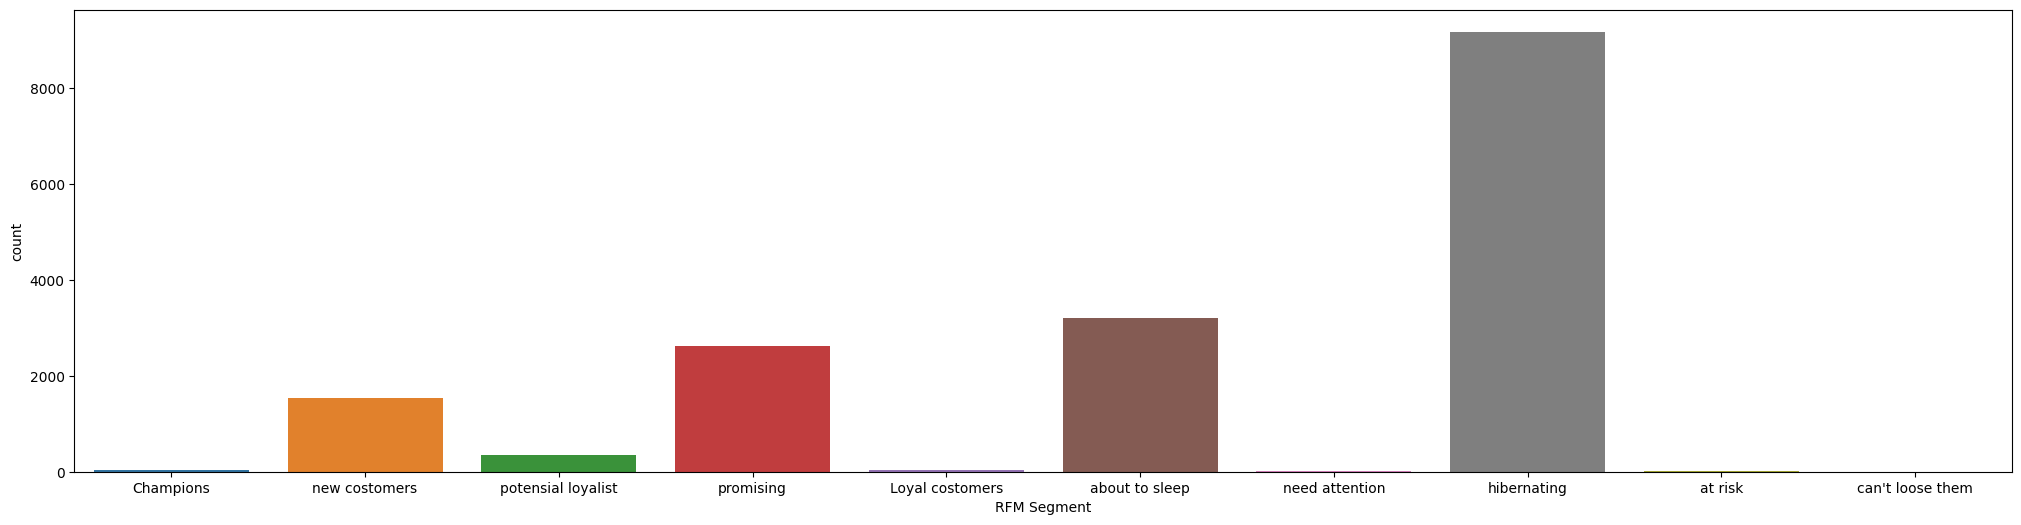

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot(x='RFM Segment', data=df_rfm)

Keterangan:

1. Champhions

Segmen ini terdiri dari 38 customers.
Customers dapat dikatakan Champhions jika terakhir melakukan transaksi pada tahun 2022(recency = 5) dan frekuensi melakukan transaksi lebih dari 24 kali (frekuensi = 4 atau 5).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 20 customers.

2. Potential loyalist

Segmen ini terdiri dari 353 customers.
Customers dapat dikatakan potential loyalist jika terakhir melakukan transaksi pada tahun 2022 atau 2019 (recency = 4 atau 5) dan frekuensi melakukan transaksi antara 7-24  kali (frekuensi = 2 atau 3).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 284 customers.

3. New Customers

Segmen ini terdiri dari 1539 customers.
Customers dapat dikatakan new costomers jika terakhir melakukan transaksi pada tahun 2022 (recency = 5) dan frekuensi melakukan transaksi antara kurang dari 7 kali (frekuensi = 1).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 948 customers.

4. Loyal Costomers

Segmen ini terdiri dari 26 customers.
Customers dapat dikatakan loyal costomers jika terakhir melakukan transaksi pada tahun 2020 atau 2021 (recency = 3 atau 4) dan frekuensi melakukan transaksi antara lebih dari 24 kali (frekuensi = 4 atau 5).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 15 customers.

5. Promising

Segmen ini terdiri dari 2625 customers.
Customers dapat dikatakan promising jika terakhir melakukan transaksi pada tahun 2021 (recency = 4) dan frekuensi melakukan transaksi antara kurang dari 27 kali (frekuensi = 1).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 1424 customers.

6. Need Attention

Segmen ini terdiri dari 12 customers
Customers dapat dikatakan need attention jika terakhir melakukan transaksi pada tahun 2020 (recency = 3) dan frekuensi melakukan transaksi antara 13-24 kali (frekuensi = 3).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 5 customers.

7. About to Sleep

Segmen ini terdiri dari 3202 customers
Customers dapat dikatakan About to Sleep jika terakhir melakukan transaksi pada tahun 2020 (recency = 3) dan frekuensi melakukan transaksi kurang dari 13 kali (frekuensi = 1 atau 2).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 1590 customers.

8. Can't Loose Them

Segmen ini terdiri dari 1 customers dari kategori F&B
Customers dapat dikatakan can't loose them jika terakhir melakukan transaksi pada tahun 2019 dan sebelumnya (recency = 1 & 2) dan frekuensi melakukan transaksi lebih dari 36 kali (frekuensi = 5).

9. At Risk

Segmen ini terdiri dari 12 customers
Customers dapat dikatakan at risk jika terakhir melakukan transaksi pada tahun 2019 dan sebelumnya (recency = 1 & 2) dan frekuensi melakukan transaksi antara 13-36 kali (frekuensi = 3 atau 4).
Pada segmen ini customers paling banyak membeli kategori 3C & Others sebanyak 6 customers.

10. Hibernating

Segmen ini terdiri dari 9179 customers
Customers dapat dikatakan hibernating jika terakhir melakukan transaksi pada tahun 2019 dan sebelumnya (recency = 1 & 2) dan frekuensi melakukan transaksi kurang dari 13 kali (frekuensi = 1 atau 2).
Pada segmen ini customers paling banyak membeli kategori F&B sebanyak 5719 customers.